# This Model Predicts whether a person has coronavirus or not based on the dummy data

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

In [11]:
df = pd.read_csv("Corona_Dataset.csv")
df.head(6)

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
0,98.100530,1,59,0,0,0
1,99.680427,1,92,1,-1,1
2,101.911668,0,57,1,0,1
3,101.851748,0,38,1,-1,0
4,100.970176,1,28,0,0,1
5,99.438024,0,25,0,-1,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   fever          2999 non-null   float64
 1   bodyPain       2999 non-null   int64  
 2   age            2999 non-null   int64  
 3   runnyNose      2999 non-null   int64  
 4   diffBreath     2999 non-null   int64  
 5   infectionProb  2999 non-null   int64  
dtypes: float64(1), int64(5)
memory usage: 140.7 KB


In [9]:
df["diffBreath"].value_counts()

-1    1009
 1    1000
 0     990
Name: diffBreath, dtype: int64

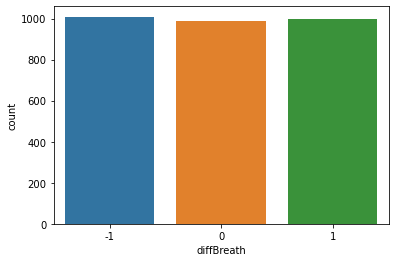

In [13]:
sns.countplot(df["diffBreath"])

In [14]:
df.describe()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
count,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000,2999.000000
mean,100.027040,0.505835,50.539847,0.494165,-0.003001,0.505168
std,1.148110,0.500049,28.769697,0.500049,0.818599,0.500057
min,98.004085,0.000000,1.000000,0.000000,-1.000000,0.000000
25%,99.028786,0.000000,26.000000,0.000000,-1.000000,0.000000
50%,100.040233,1.000000,52.000000,0.000000,0.000000,1.000000
75%,101.020368,1.000000,75.000000,1.000000,1.000000,1.000000
max,101.999449,1.000000,100.000000,1.000000,1.000000,1.000000


In [17]:
def data_split(data,ratio):
    np.random.seed(42)
    shuffled = np.random.permutation(len(data))
    test_set_size = int(len(data) * ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[train_indices] , data.iloc[test_indices]
    

In [18]:
train,test = data_split(df,0.2)

In [23]:
train.head()

,fever,bodyPain,age,runnyNose,diffBreath,infectionProb
1103,101.738976,0,41,0,-1,0
1569,99.913810,1,30,1,1,1
2229,101.762004,1,63,0,0,1
2296,100.296129,1,40,1,1,1
1800,101.249940,0,7,1,0,0


In [41]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [42]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [44]:
Y_train

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [46]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,Y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [55]:

inputFeatures = [100,1,22,1,1]
infectionProbability = clf.predict_proba([inputFeatures])[0][1]
infectionProbability

0.5083606214232645